In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import os

# Define the path with subfolders
folder_path = 'analysis/feature_visualization'

# Create the folder structure
os.makedirs(folder_path, exist_ok=True)

### Set style for plots

In [3]:
plt.style.use('ggplot')
sns.set(style='whitegrid')

### Load the data

In [4]:
df = pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')

### Drop the first column (index)

In [5]:
if df.columns[0] == 'Unnamed: 0' or df.columns[0] == '':
    df = df.drop(df.columns[0], axis=1)

### Extract numeric values from price

In [6]:
# Preprocess the data
df['Price'] = df['Prize'].str.replace(',', '').astype(int)
df.drop('Prize', axis=1, inplace=True)

### Convert camera specifications to numeric

In [7]:
def extract_mp(text):
    if pd.isna(text):
        return np.nan
    match = re.search(r'(\d+)MP', str(text))
    if match:
        return int(match.group(1))
    return 0

In [8]:
df['Rear_Camera_MP'] = df['Rear Camera'].apply(extract_mp)
df['Front_Camera_MP'] = df['Front Camera'].apply(extract_mp)

### Convert battery to numeric

In [9]:
def extract_battery(text):
    if pd.isna(text):
        return np.nan
    match = re.findall(r'\d+', str(text))
    if match:
        return int(match[0])
    return 0

In [10]:
df['Battery_Capacity'] = df['Battery_'].apply(extract_battery)

### Create price categories for analysis

In [11]:
df['Price_Category'] = pd.cut(df['Price'], 
                             bins=[0, 10000, 20000, 30000, 50000, 100000],
                             labels=['Budget', 'Low-Mid', 'Mid-Range', 'Premium', 'Ultra Premium'])

# 1. Distribution of mobile phones by price category

Creating price category distribution visualization...


C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\1891836490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Category', data=df, palette='viridis')


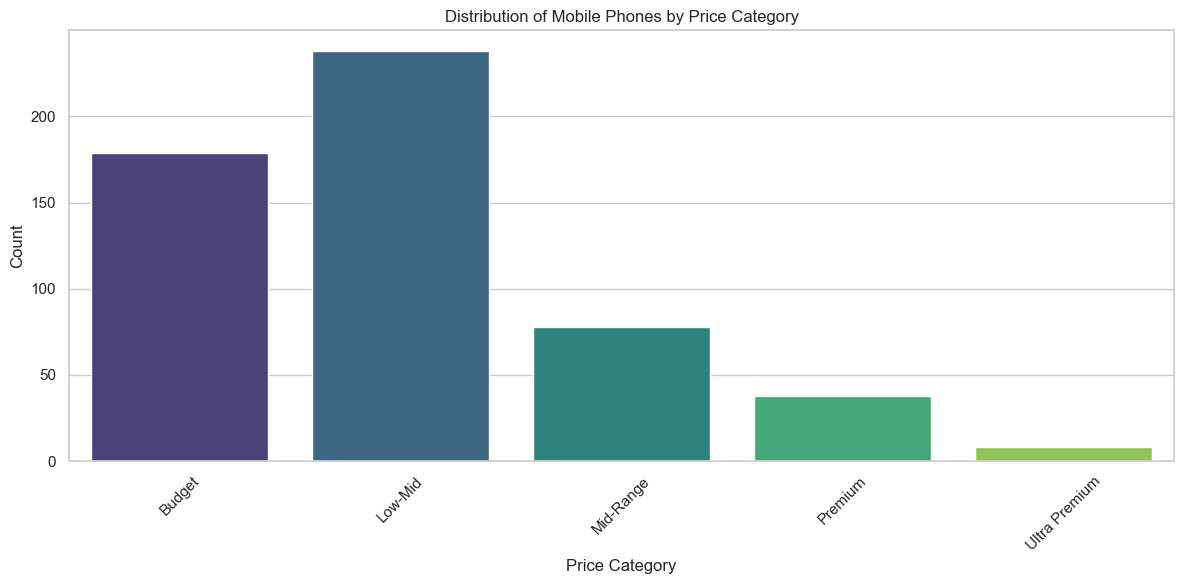

In [12]:
print("Creating price category distribution visualization...")
plt.figure(figsize=(12, 6))
sns.countplot(x='Price_Category', data=df, palette='viridis')
plt.title('Distribution of Mobile Phones by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis/feature_visualization/price_category_distribution.png')

# 2. RAM distribution across different price categories

Creating RAM distribution across price categories visualization...


C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\1533776985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Category', y='RAM', data=df, palette='coolwarm')


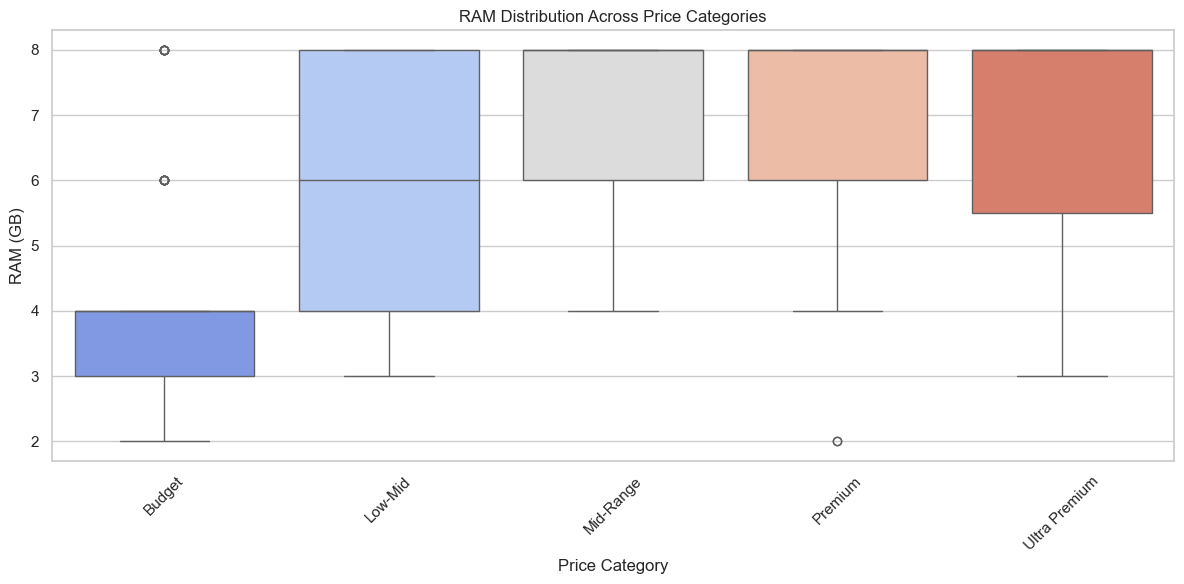

In [13]:
print("Creating RAM distribution across price categories visualization...")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Category', y='RAM', data=df, palette='coolwarm')
plt.title('RAM Distribution Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis/feature_visualization/ram_by_price_category.png')

# 3. Memory distribution across different price categories

Creating memory distribution across price categories visualization...


C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\1115833793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Category', y='Memory', data=df, palette='coolwarm')


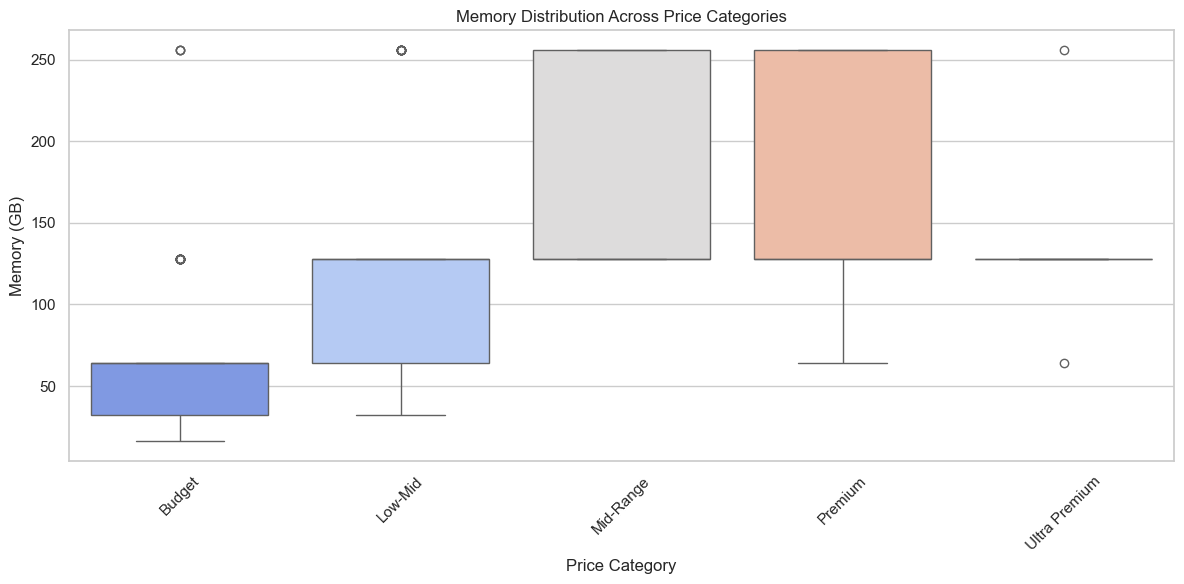

In [14]:
print("Creating memory distribution across price categories visualization...")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Category', y='Memory', data=df, palette='coolwarm')
plt.title('Memory Distribution Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Memory (GB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis/feature_visualization/memory_by_price_category.png')

# 4. Camera quality across price categories

In [15]:
print("Creating camera quality across price categories visualization...")
plt.figure(figsize=(12, 10))

Creating camera quality across price categories visualization...


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\1640940849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Category', y='Rear_Camera_MP', data=df, palette='coolwarm')


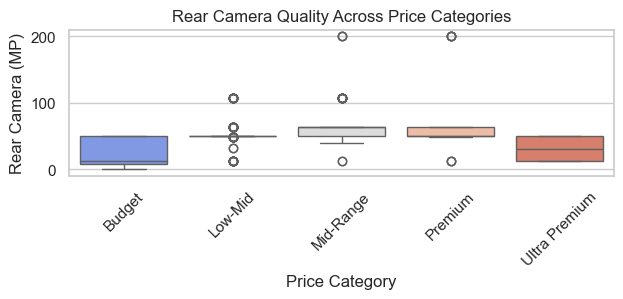

In [16]:
plt.subplot(2, 1, 1)
sns.boxplot(x='Price_Category', y='Rear_Camera_MP', data=df, palette='coolwarm')
plt.title('Rear Camera Quality Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Rear Camera (MP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis/feature_visualization/rcamera_by_price_category.png')

C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\1251926379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Category', y='Front_Camera_MP', data=df, palette='coolwarm')


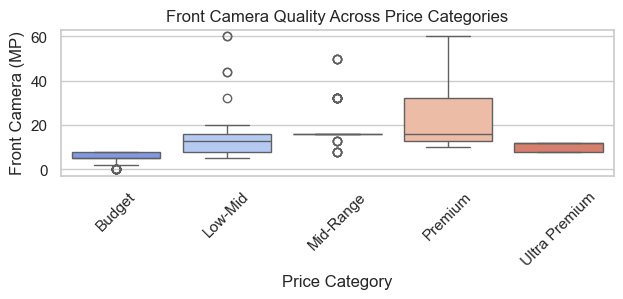

In [17]:
plt.subplot(2, 1, 2)
sns.boxplot(x='Price_Category', y='Front_Camera_MP', data=df, palette='coolwarm')
plt.title('Front Camera Quality Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Front Camera (MP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis/feature_visualization/fcamera_by_price_category.png')

# 5. Battery capacity across price categories

Creating battery capacity across price categories visualization...


C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\3850858234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Category', y='Battery_Capacity', data=df, palette='coolwarm')


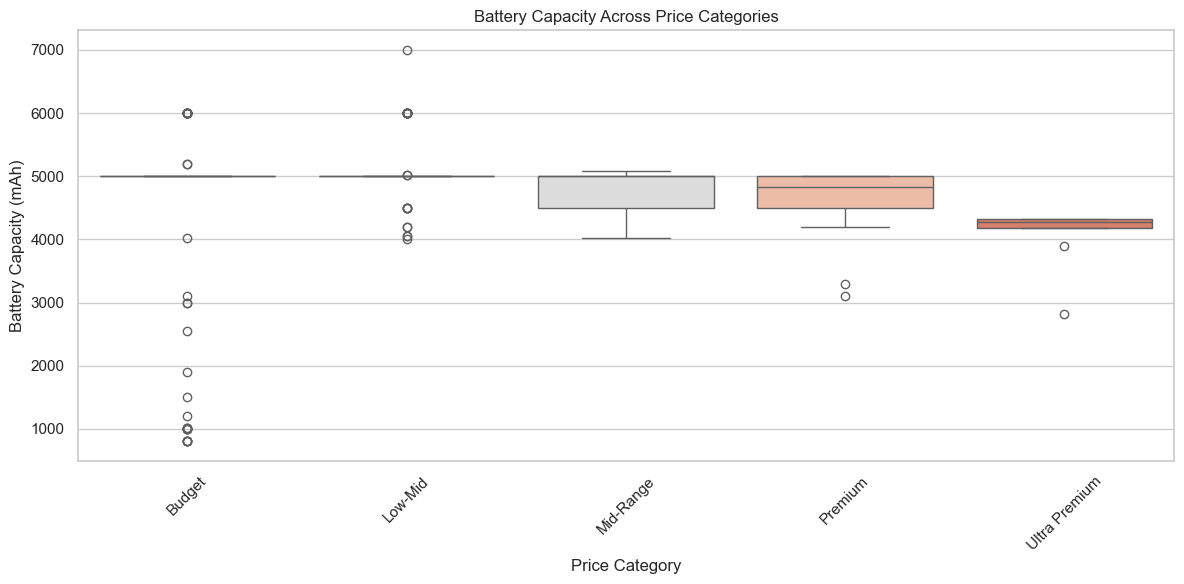

In [18]:
print("Creating battery capacity across price categories visualization...")
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Category', y='Battery_Capacity', data=df, palette='coolwarm')
plt.title('Battery Capacity Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Battery Capacity (mAh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis/feature_visualization/battery_by_price_category.png')

# 6. Brand analysis (extract brand from model name)

In [19]:
# Extract brand from Model column
df['Brand'] = df['Model'].apply(lambda x: x.split()[0] if pd.notnull(x) else 'Unknown')

In [20]:
# Count the number of models by brand
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']

In [21]:
# Calculate average price by brand
brand_avg_price = df.groupby('Brand')['Price'].mean().reset_index()
brand_avg_price.columns = ['Brand', 'Avg_Price']

In [22]:
# Merge the dataframes
brand_analysis = pd.merge(brand_counts, brand_avg_price, on='Brand')
brand_analysis = brand_analysis.sort_values('Count', ascending=False).head(15)

### Visualize top brands by count

C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\1875245160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Brand', data=brand_analysis.sort_values('Count', ascending=False), palette='viridis')


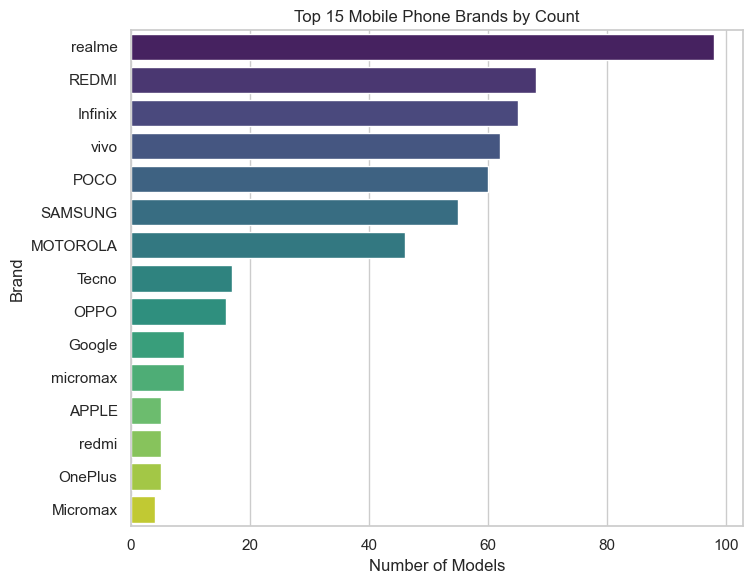

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Brand', data=brand_analysis.sort_values('Count', ascending=False), palette='viridis')
plt.title('Top 15 Mobile Phone Brands by Count')
plt.xlabel('Number of Models')
plt.tight_layout()
plt.savefig('analysis/feature_visualization/brand_analysis_count.png')

### Visualize top brands by average price

C:\Users\Hasan\AppData\Local\Temp\ipykernel_31592\2917032705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Price', y='Brand', data=brand_analysis.sort_values('Avg_Price', ascending=False), palette='rocket')


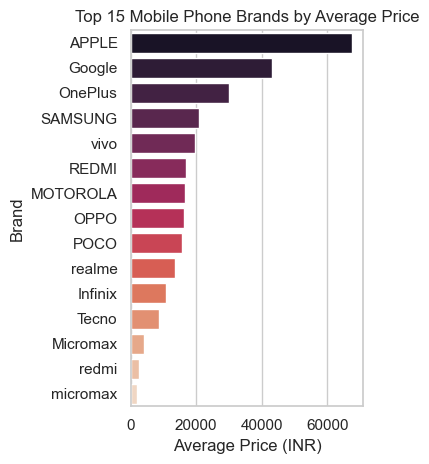

In [24]:
plt.subplot(1, 2, 2)
sns.barplot(x='Avg_Price', y='Brand', data=brand_analysis.sort_values('Avg_Price', ascending=False), palette='rocket')
plt.title('Top 15 Mobile Phone Brands by Average Price')
plt.xlabel('Average Price (INR)')
plt.tight_layout()
plt.savefig('analysis/feature_visualization/brand_analysis_price.png')

# 7. Advanced Feature Analysis using PCA

In [25]:
# Select numeric features for PCA
numeric_df = df[['RAM', 'Memory', 'Battery_Capacity', 'Rear_Camera_MP', 'Front_Camera_MP', 'Mobile Height']].copy()

In [26]:
# Handle missing values
numeric_df = numeric_df.fillna(numeric_df.median())

In [27]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [28]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [29]:
# Create DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Price_Category'] = df['Price_Category'].values
pca_df['Price'] = df['Price'].values

### Visualize PCA results colored by price category

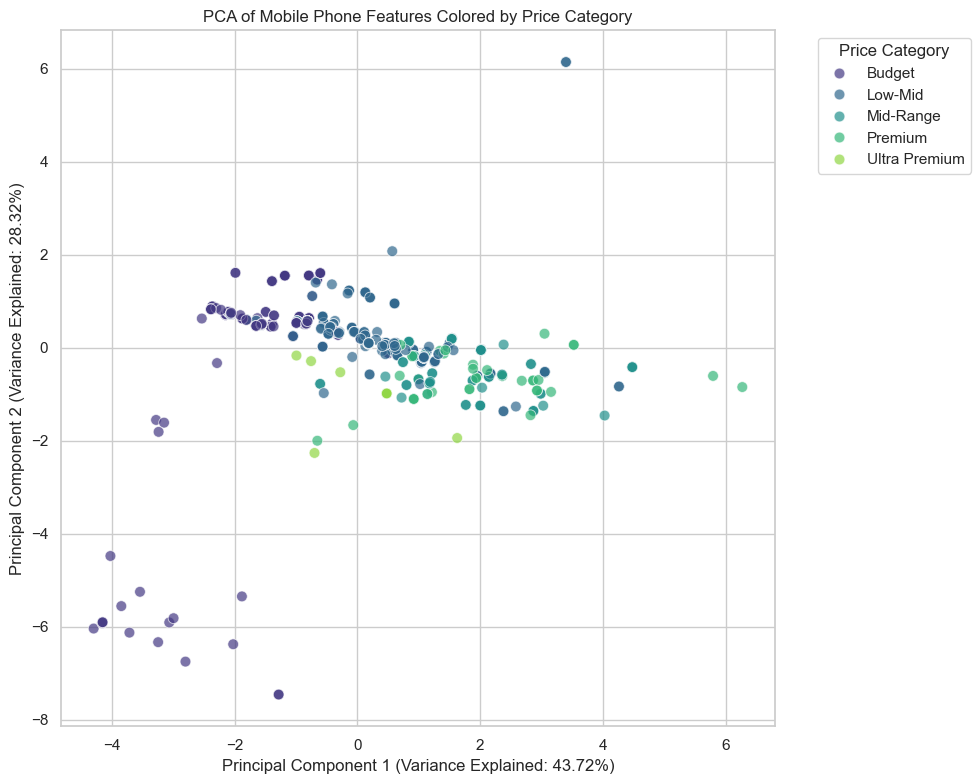

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Price_Category', data=pca_df, palette='viridis', s=60, alpha=0.7)
plt.title('PCA of Mobile Phone Features Colored by Price Category')
plt.xlabel(f'Principal Component 1 (Variance Explained: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 (Variance Explained: {pca.explained_variance_ratio_[1]:.2%})')
plt.legend(title='Price Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('analysis/feature_visualization/pca_price_category.png')

# 8. Market Segmentation using K-means clustering

In [31]:
print("Performing market segmentation with K-means clustering...")
# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Performing market segmentation with K-means clustering...


C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

### Plot the elbow method

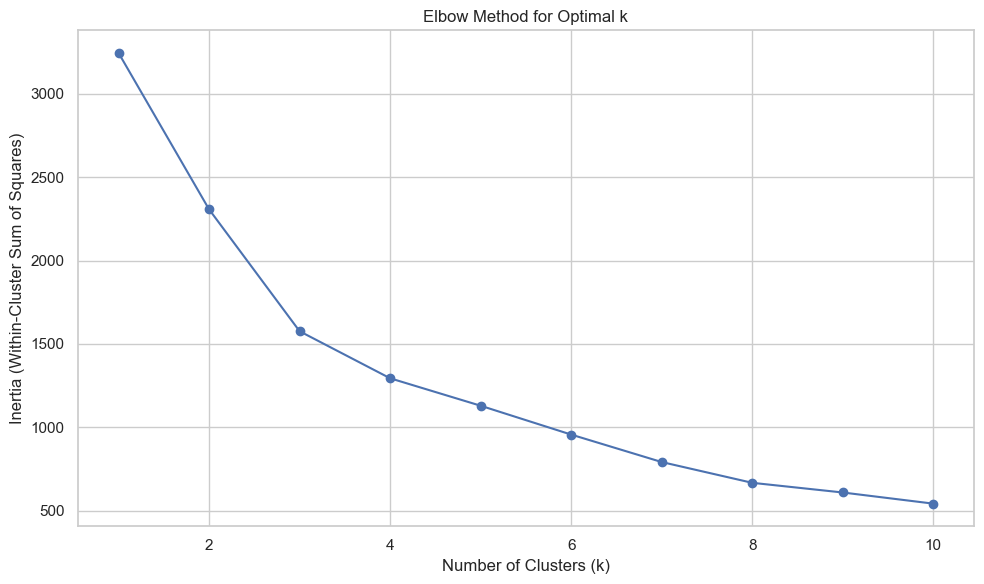

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.tight_layout()
plt.savefig('analysis/feature_visualization/kmeans_elbow.png')

In [33]:
# Apply K-means with the optimal number of clusters (4 or 5 based on elbow curve)
n_clusters = 4  # This can be adjusted based on the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [34]:
# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

In [35]:
# Create a new dataframe with cluster statistics
cluster_stats = df.groupby('Cluster').agg({
    'Price': 'mean',
    'RAM': 'mean',
    'Memory': 'mean',
    'Battery_Capacity': 'mean',
    'Rear_Camera_MP': 'mean',
    'Front_Camera_MP': 'mean'
}).reset_index()

### Visualize the clusters

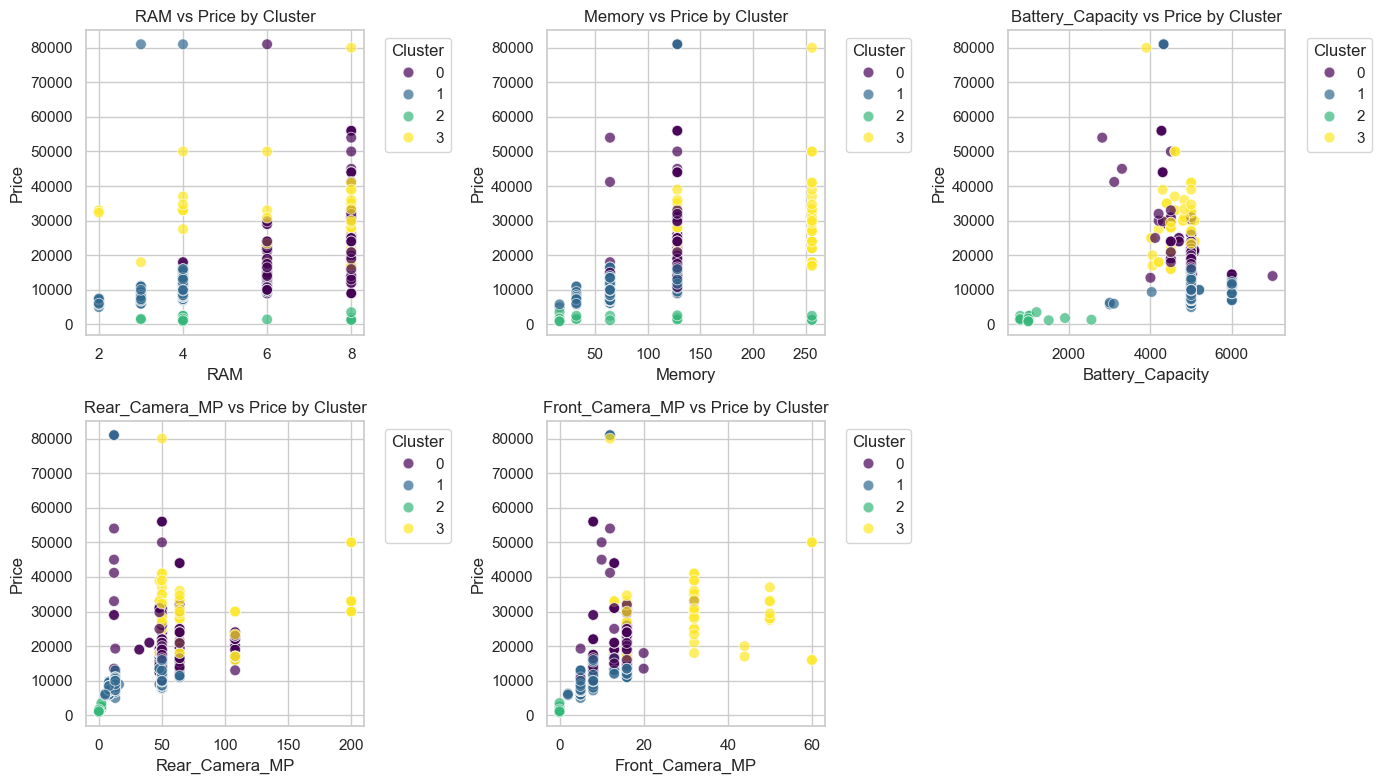

In [36]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(['RAM', 'Memory', 'Battery_Capacity', 'Rear_Camera_MP', 'Front_Camera_MP']):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=feature, y='Price', hue='Cluster', data=df, palette='viridis', s=60, alpha=0.7)
    plt.title(f'{feature} vs Price by Cluster')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('analysis/feature_visualization/cluster_analysis.png')

In [37]:
# Create a parallel coordinates plot for the clusters
plt.figure(figsize=(14, 8))
cluster_stats_normalized = cluster_stats.copy()
for column in cluster_stats_normalized.columns:
    if column != 'Cluster':
        min_val = cluster_stats_normalized[column].min()
        max_val = cluster_stats_normalized[column].max()
        cluster_stats_normalized[column] = (cluster_stats_normalized[column] - min_val) / (max_val - min_val)

<Figure size 1400x800 with 0 Axes>

In [38]:
# Melt the dataframe for parallel coordinates
melted_df = pd.melt(cluster_stats_normalized, id_vars=['Cluster'], var_name='Feature', value_name='Value')

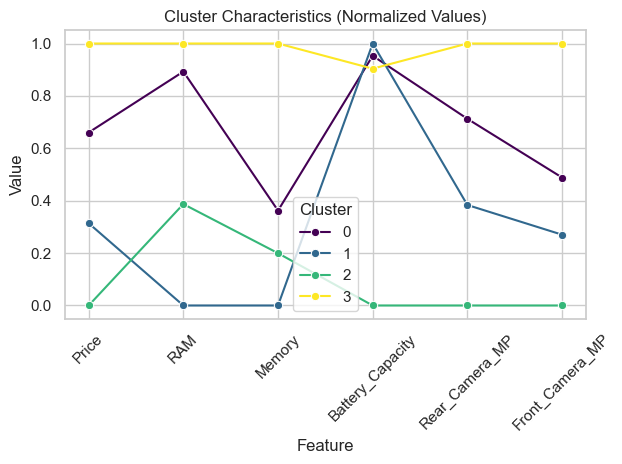

In [39]:
# Plot parallel coordinates
sns.lineplot(x='Feature', y='Value', hue='Cluster', data=melted_df, palette='viridis', marker='o')
plt.title('Cluster Characteristics (Normalized Values)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('analysis/feature_visualization/cluster_parallel_coordinates.png')

# 9. Feature Pair Analysis

In [40]:
print("Creating feature pair analysis visualization...")
# Create a subset of the data for pair plot (to avoid crowding)
pair_df = df.sample(n=min(200, len(df)), random_state=42)
pair_features = ['RAM', 'Memory', 'Rear_Camera_MP', 'Front_Camera_MP', 'Battery_Capacity']

Creating feature pair analysis visualization...


<Figure size 1500x1500 with 0 Axes>

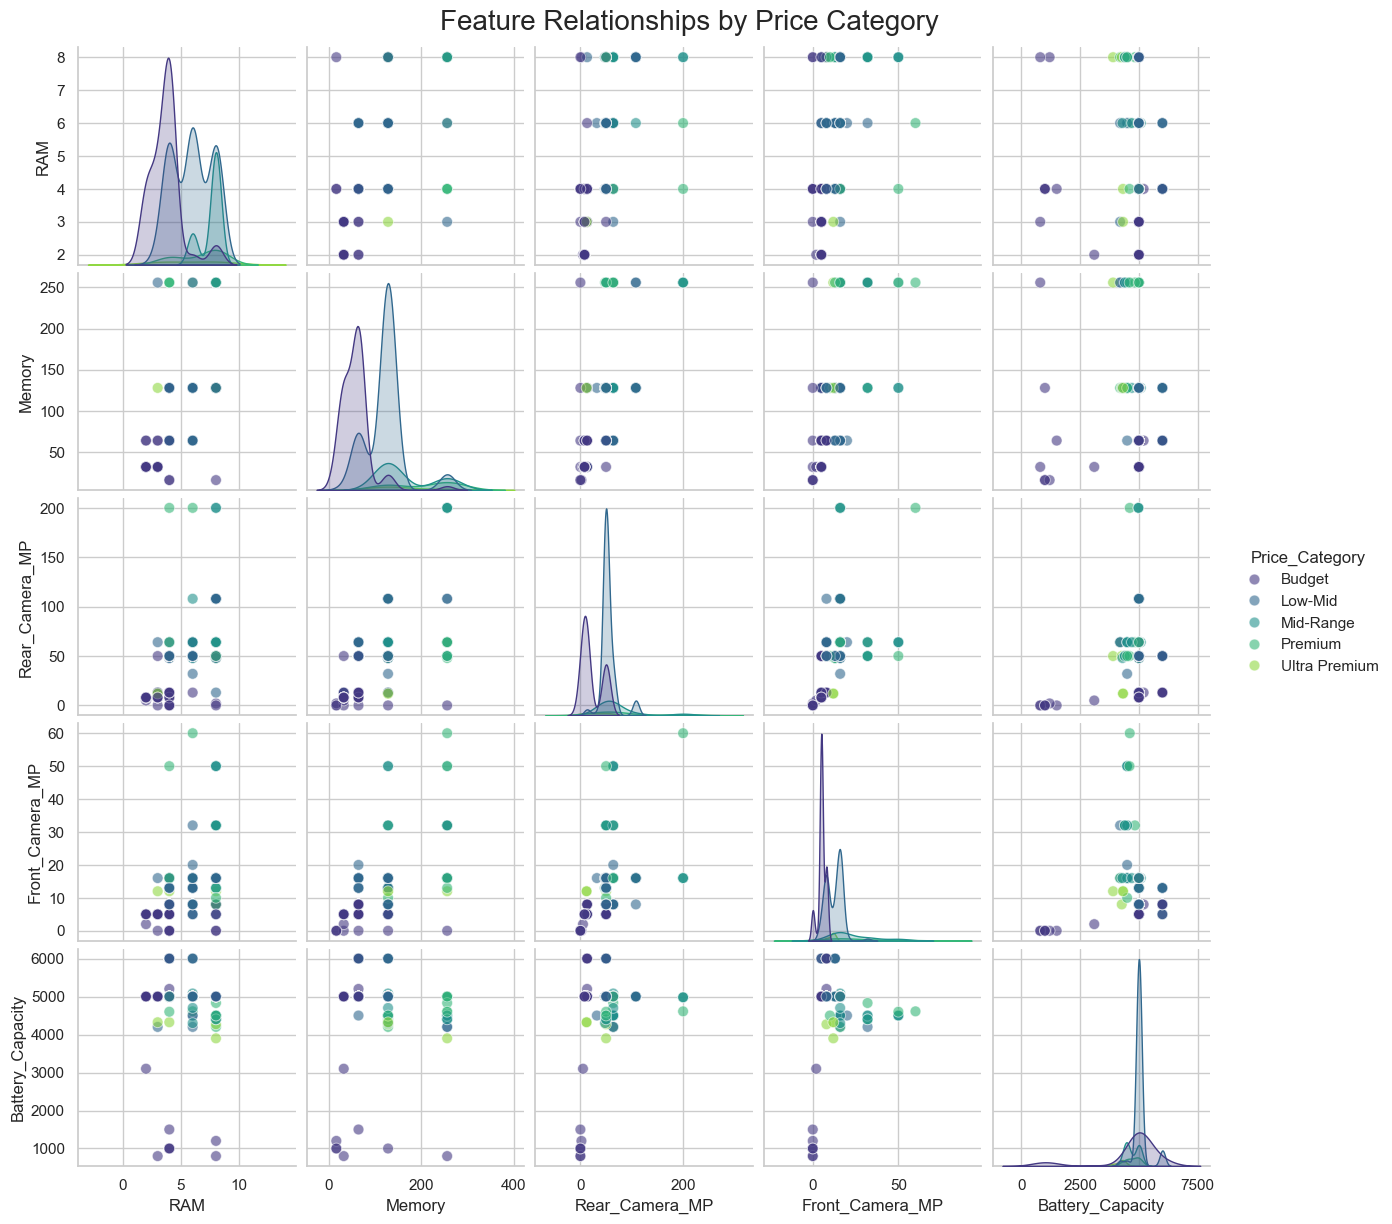

In [41]:
# Create pair plot
plt.figure(figsize=(15, 15))
pair_plot = sns.pairplot(pair_df, vars=pair_features, hue='Price_Category', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 60})
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Feature Relationships by Price Category', size=20)
plt.savefig('analysis/feature_visualization/feature_pairplot.png')